In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
networkpatterns = pd.read_csv('network_traffic_data_extended.csv')
networkpatterns.head(10)

,timestamp,bandwidth_in (kb),bandwidth_out (kb),jenis_probo,ping,label
0,2024-12-01 00:00:00,1924,509,ftp,28.23,Normal
1,2024-12-01 00:00:15,2386,1779,ftp,74.33,Normal
2,2024-12-01 00:01:10,1524,9774,http,4.15,Flood
3,2024-12-01 00:00:18,3682,3911,https,60.60,Normal
4,2024-12-01 00:02:24,3357,11831,ftp,70.43,Flood
5,2024-12-01 00:02:15,3711,7459,https,28.54,Normal
6,2024-12-01 00:05:36,206,2715,ftp,42.84,Normal
7,2024-12-01 00:02:06,2647,3627,dns,34.32,Normal
8,2024-12-01 00:00:48,6324,1684,icmp,84.90,Normal
9,2024-12-01 00:05:51,4433,811,ftp,46.48,Normal


In [3]:
networkpatterns.tail(10)

,timestamp,bandwidth_in (kb),bandwidth_out (kb),jenis_probo,ping,label
3003,2024-12-14 21:00:00,9851,3125,tcp,175.38,Flood
3004,2024-12-11 22:00:00,1367,7940,udp,31.34,Normal
3005,2024-12-22 04:00:00,9318,8911,udp,5.76,Flood
3006,2024-12-17 22:00:00,6577,9029,icmp,96.82,Flood
3007,2024-12-12 02:00:00,1222,4110,tcp,159.35,Normal
3008,2024-12-21 00:00:00,10174,1201,http,83.34,Flood
3009,2024-12-16 23:00:00,11443,4775,tcp,129.83,Flood
3010,2024-12-10 23:00:00,4072,10861,tcp,88.88,Flood
3011,2024-12-13 01:00:00,9292,4580,tcp,189.40,Flood
3012,2024-12-13 05:00:00,10333,7122,tcp,98.39,Flood


In [4]:
networkpatterns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3013 entries, 0 to 3012
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   timestamp           3013 non-null   object 
 1   bandwidth_in (kb)   3013 non-null   int64  
 2   bandwidth_out (kb)  3013 non-null   int64  
 3   jenis_probo         3013 non-null   object 
 4   ping                3013 non-null   float64
 5   label               3013 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 141.4+ KB


In [5]:
# === 1. Data Preparation ===
x_networkpatterns = networkpatterns[['bandwidth_in (kb)', 'bandwidth_out (kb)', 'ping']]
y_networkpatterns = networkpatterns['label']

In [6]:
# === 2. Encode Label ===
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_networkpatterns)  # Flood = 1, Normal = 0

In [7]:
# Splitting Dataset menjadi Data Training dan Data Testing
X_networkpatterns_train, X_networkpatterns_test, y_networkpatterns_train, y_networkpatterns_test = train_test_split(
    x_networkpatterns, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [8]:
# Standardisasi
sc_networkpatterns = StandardScaler()
X_networkpatterns_train = sc_networkpatterns.fit_transform(X_networkpatterns_train)
X_networkpatterns_test = sc_networkpatterns.transform(X_networkpatterns_test)


In [9]:
ER_networkpatterns = []
k_range = range(1, 30)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_networkpatterns_train, y_networkpatterns_train)
    y_pred = knn.predict(X_networkpatterns_test)
    ER_networkpatterns.append(1 - accuracy_score(y_networkpatterns_test, y_pred))

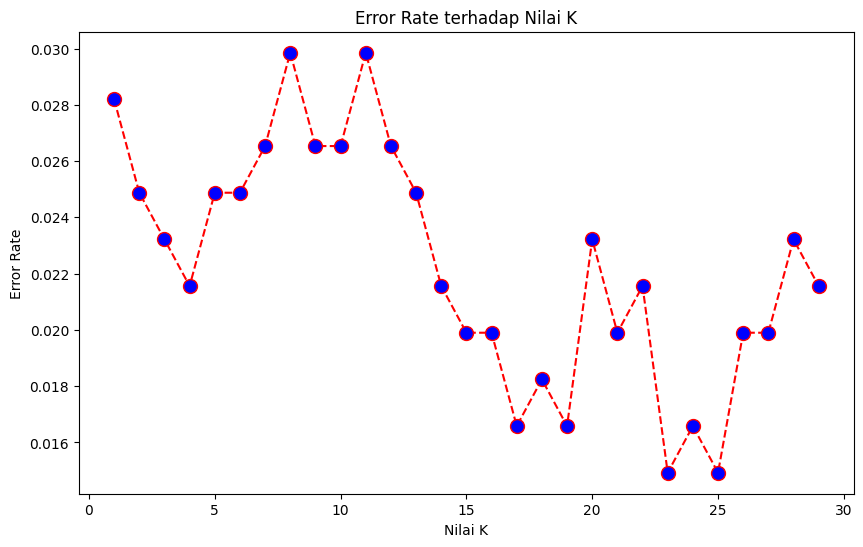

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, ER_networkpatterns, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.xlabel('Nilai K')
plt.ylabel('Error Rate')
plt.title('Error Rate terhadap Nilai K')
plt.show()

In [11]:
# Prosedur Pelatihan Model dengan KNN
k_optimal = 11
knn = KNeighborsClassifier(n_neighbors=k_optimal)
knn.fit(X_networkpatterns_train, y_networkpatterns_train)
y_networkpatterns_pred = knn.predict(X_networkpatterns_test)

In [12]:
#Evaluasi Model
print(f'Akurasi dengan k = {k_optimal} : {accuracy_score(y_networkpatterns_test, y_networkpatterns_pred) * 100:.2f}%')

Akurasi dengan k = 11 : 97.01%


In [13]:
# Confusion Matrix
print("\nConfusion Matrix K 11: ")
print(confusion_matrix(y_networkpatterns_test, y_networkpatterns_pred))


Confusion Matrix K 11: 
[[268   9]
 [  9 317]]


In [14]:
# Classification Report
print("\nClassification Report K 11: ")
print(classification_report(y_networkpatterns_test, y_networkpatterns_pred, target_names=label_encoder.classes_))


Classification Report K 11: 
              precision    recall  f1-score   support

       Flood       0.97      0.97      0.97       277
      Normal       0.97      0.97      0.97       326

    accuracy                           0.97       603
   macro avg       0.97      0.97      0.97       603
weighted avg       0.97      0.97      0.97       603



In [16]:
# Prediksi Probabilitas
print("\nProbabilitas Prediksi untuk Data Testing:")
y_prob = knn.predict_proba(X_networkpatterns_test)

# Contoh: Tampilkan probabilitas untuk 5 data pertama
for i in range(5):
    print(f"Network {i+1}:")
    print(f"  Flood: {y_prob[i][1] * 100:.2f}%")
    print(f"  Normal: {y_prob[i][0] * 100:.2f}%\n")


Probabilitas Prediksi untuk Data Testing:
Network 1:
  Flood: 0.00%
  Normal: 100.00%

Network 2:
  Flood: 0.00%
  Normal: 100.00%

Network 3:
  Flood: 0.00%
  Normal: 100.00%

Network 4:
  Flood: 0.00%
  Normal: 100.00%

Network 5:
  Flood: 0.00%
  Normal: 100.00%

